In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tabulate import tabulate

from arch import arch_model
from arch.__future__ import reindexing


In [2]:
df = pd.read_csv('Gold_Price.csv') 
print(df)

             Date  G_Price     G_Ret
0    Apr 01, 2020   1625.7  0.029654
1    Apr 02, 2020   1633.7  0.004909
2    Apr 05, 2020   1677.0  0.026159
3    Apr 06, 2020   1664.8 -0.007301
4    Apr 07, 2020   1665.4  0.000360
..            ...      ...       ...
458  Jan 25, 2022   1852.7  0.005955
459  Jan 26, 2022   1829.9 -0.012383
460  Jan 27, 2022   1793.3 -0.020204
461  Jan 28, 2022   1784.9 -0.004695
462  Jan 31, 2022   1795.0  0.005643

[463 rows x 3 columns]


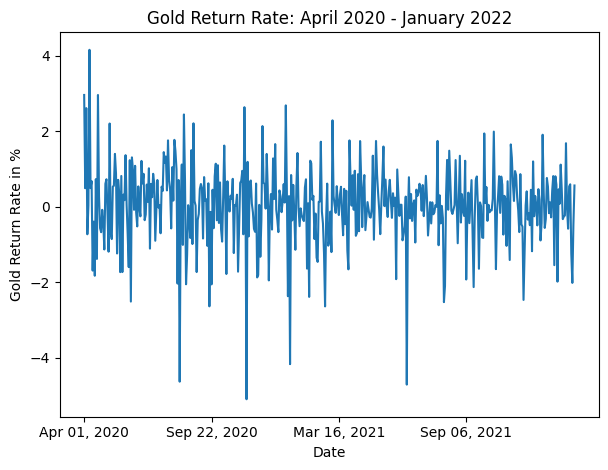

In [3]:
TIME=df['Date']
GOLDRET=df['G_Ret']*100

# plotting the points 
plt.plot(TIME,GOLDRET)

# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Gold Return Rate in %')
  
# giving a title to my graph
plt.title('Gold Return Rate: April 2020 - January 2022')

plt.tight_layout()
plt.xticks(np.arange(0, len(TIME)+2, 120)) ### xtick at every 120 steps to avoid label jamming
# function to show the plot
plt.show()

In [4]:
daily_volatility = GOLDRET.std()
monthly_volatility = np.sqrt(21) * daily_volatility
annual_volatility = np.sqrt(252) * daily_volatility

print(tabulate([['Gold Return',daily_volatility,monthly_volatility,annual_volatility]],headers = 
['Daily Volatility %', 'Monthly Volatility %', 'Annual Volatility %'],tablefmt = 'fancy_grid',stralign='center',numalign =
'center',floatfmt=".2f"))

╒═════════════╤══════════════════════╤════════════════════════╤═══════════════════════╕
│             │  Daily Volatility %  │  Monthly Volatility %  │  Annual Volatility %  │
╞═════════════╪══════════════════════╪════════════════════════╪═══════════════════════╡
│ Gold Return │         1.05         │          4.83          │         16.72         │
╘═════════════╧══════════════════════╧════════════════════════╧═══════════════════════╛


# Build GARCH Model

In [5]:
garch_model = arch_model(GOLDRET, p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')
gm_result = garch_model.fit(disp='on') ### disp='off' turns off the iteration lines
print(gm_result.params)
print('\n')  ### print new line
gm_forecast = gm_result.forecast(horizon = 10)
print(gm_forecast.variance.head())   ### here by default prints only the next out-of-sample row

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5417126370.612264
Iteration:      2,   Func. Count:     14,   Neg. LLF: 21165227238.26148
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1207.7173920361452
Iteration:      4,   Func. Count:     28,   Neg. LLF: 675.2052845009462
Iteration:      5,   Func. Count:     34,   Neg. LLF: 674.6210730539294
Iteration:      6,   Func. Count:     40,   Neg. LLF: 674.4616086204029
Iteration:      7,   Func. Count:     45,   Neg. LLF: 705.7170220118693
Iteration:      8,   Func. Count:     52,   Neg. LLF: 678.1251811311303
Iteration:      9,   Func. Count:     59,   Neg. LLF: 674.4353589170084
Iteration:     10,   Func. Count:     64,   Neg. LLF: 674.4348550844909
Iteration:     11,   Func. Count:     69,   Neg. LLF: 674.4348140312516
Iteration:     12,   Func. Count:     73,   Neg. LLF: 674.4348140315873
mu          0.017141
omega       0.063754
alpha[1]    0.001298
beta[1]     0.936470
Name: params, dtype: float64


         h.01      h

In [6]:
Z=garch_model.fit()
Z.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5417126370.612264
Iteration:      2,   Func. Count:     14,   Neg. LLF: 21165227238.26148
Iteration:      3,   Func. Count:     22,   Neg. LLF: 1207.7173920361452
Iteration:      4,   Func. Count:     28,   Neg. LLF: 675.2052845009462
Iteration:      5,   Func. Count:     34,   Neg. LLF: 674.6210730539294
Iteration:      6,   Func. Count:     40,   Neg. LLF: 674.4616086204029
Iteration:      7,   Func. Count:     45,   Neg. LLF: 705.7170220118693
Iteration:      8,   Func. Count:     52,   Neg. LLF: 678.1251811311303
Iteration:      9,   Func. Count:     59,   Neg. LLF: 674.4353589170084
Iteration:     10,   Func. Count:     64,   Neg. LLF: 674.4348550844909
Iteration:     11,   Func. Count:     69,   Neg. LLF: 674.4348140312516
Iteration:     12,   Func. Count:     73,   Neg. LLF: 674.4348140315873
Optimization terminated successfully    (Exit mode 0)
            Current function value: 674.4348140312516
            Iterations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  G_Ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -674.435
Distribution:                  Normal   AIC:                           1356.87
Method:            Maximum Likelihood   BIC:                           1373.42
                                        No. Observations:                  463
Date:                Tue, Feb 25 2025   Df Residuals:                      462
Time:                        13:50:02   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0171  4.778e-02      0.359      0.720 [-7.650e-02,  0.111]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0638  4.487e-02      1.421      0.155   [-2.419e-02,  0.152]
alpha[1]   1.2981e-03  1.436e-02  9.037e-02      0.928 [-2.685e-02,2.945e-02]
beta[1]        0.9365  4.238e-02     22.096 3.475e-108      [  0.853,  1.020]
=============================================================================

Covariance estimator: robust
"""

Rolling Predictions: At this point, we have developed a GARCH model that can forecast Gold return volatility. We can now put our model to the test using historical data from the n-period of time in a rolling prediction process.
Create a training set in a loop using the daily return rates from the ith day to the (i + trgset size)th day. 
In each loop, the current training set is used to train a GARCH (1,1) model with the parameters p and q set to 1. The current model forecasts next day volatility with a 1-time step (horizon=1 day). The result (standard deviation) is appended to the rolling predictions. The rolling window for estimation then shifts to trg set (i+1)th to (i + 1 + trgset size)th day. The next 1-time step ahead volatility is predicted and added to the rolling predictions variable.

In [7]:
df2=pd.DataFrame(GOLDRET)
print(df2)

        G_Ret
0    2.965353
1    0.490889
2    2.615910
3   -0.730149
4    0.036034
..        ...
458  0.595498
459 -1.238271
460 -2.020382
461 -0.469511
462  0.564263

[463 rows x 1 columns]


In [8]:
GOLDRET=df2['G_Ret'] ### put back SPRET in a dataframe for rolling window app below

Text(0.5, 1.0, 'Rolling Prediction of daily Gold return Volatility in %')

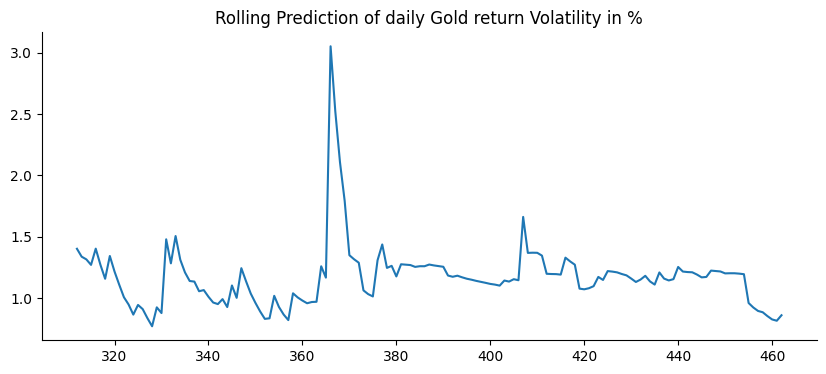

In [9]:
rolling_predictions = []
trgset_size = 100  
### uses estimation sample of size 100 starting on 1 April 2020. Then after estimation of GARCH model
###   predicts variance of next day. Then uses next rolling sample, and predicts
###   variance of next day, and so on. Sq root of var or vola is then stored in 'rolling_predictions' vector.
###   Altogether 151 predictions

for i in range(151):
    train = GOLDRET[i:i+trgset_size]  ### train has length 200, i.e. SPRET[1:201] has length 200
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=df2['G_Ret'].index[-151:])

fig,ax = plt.subplots(figsize=(10,4))
ax.spines[['top','right']].set_visible(False)
plt.plot(rolling_predictions)
plt.title('Rolling Prediction of daily Gold return Volatility in %')

In [10]:
len(rolling_predictions)

151

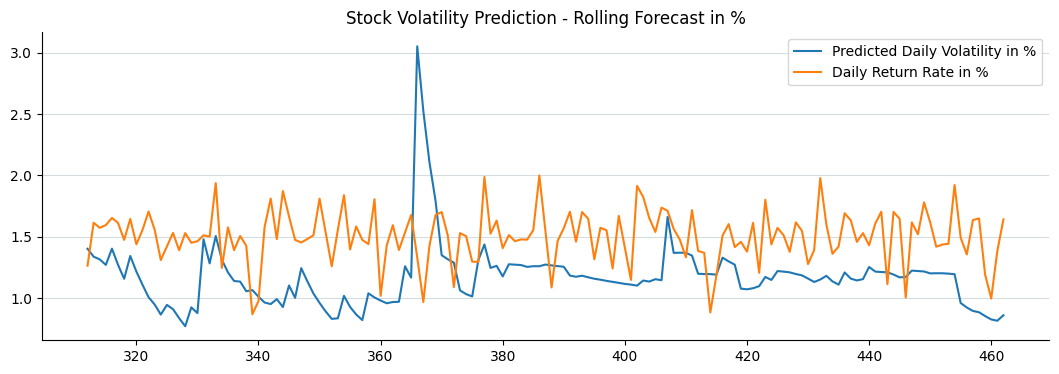

In [11]:
fig,ax = plt.subplots(figsize=(13,4))
ax.grid(which="major", axis='y', color='#758D99', alpha=0.3, zorder=1)
ax.spines[['top','right']].set_visible(False)

plt.plot(rolling_predictions)
plt.plot(GOLDRET[-151:]*.25+1.5) 
### Affine-transformed to compare the trends (S&P500 return rates scales to visually compare with predicted vola)
plt.title('Stock Volatility Prediction - Rolling Forecast in %')
plt.legend(['Predicted Daily Volatility in %','Daily Return Rate in %'])